# Assignment 6 Solving for the Wave Function

based on https://www.compadre.org/PICUP/exercises/exercise.cfm?I=115&A=shooting by Andy Rundquist

This Assignment should take you approximately 120 minutes to complete.

After completing this Assignment, you will be able to...
* Describe the shooting method for solving for eigenenergies and eigenfunctions.
* Use appropriate units for distance, energy, and time so that analytical and numeric results can be compared.
* Model any shape potential well.

Dr. Lane welcomes your questions about this assignment. Please send or bring a copy of your work-in-progress with your questions.

## Theory

All of quantum mechanics is govered by the **Schrodinger equation**, which relates the **wave funciton** $\psi(x)$ of an electron to the **potential energy** $V(x)$ that the electron experiences:

$$
-\frac{\hbar^2}{2m} \psi'' + V \psi = E \psi,
$$

where $\hbar$ is Planck's constant, $m$ is the electron's mass, and $E$ is the electron's total energy (kinetic plus potential). This is a **differential equation**, meaning the answer is a function $\psi(x)$. This wave function has a few special properties:
* Squaring $\psi$ tells you the probability density of where you can find the electron. Wherever $\psi = 0$, the electron cannot be; wherever $\psi$ is larger, the electron is more likely to be.
* $\psi$ has to be finite everywhere.
* $\psi$ has to a continuous single-valued function.
* $\psi$ has to drop to 0 as $x$ appropaches $\pm \infty$.
* Only special functions can qualify to be a wave function. The mathematical term for "special function" is **eigenfunction**. Each eigenfunction is associated with a special energy value, or **eigenenergy**. Each potential energy $V(x)$ that you study has a set of eigenfunctions and eigenenergies. For most problems, we have no way of knowing ahead of time what those eigenfunctions and eigenenergies will look like.

Differential equations are notoriously complicated to solve. Our textbook will walk you through the solution of a handful, but for most potential energy functions, we **can't** develop a solution.

But if we use computational methods, we can graph a numerical solution for **any** potential energy function. You'll learn how to carry out such a method in this Assignment.

## The Shooting Method

A basic way of solving the Schrodinger equation is [the shooting method](https://en.wikipedia.org/wiki/Shooting_method). In this method, we guess a value for $E$ and start at the left side of our graph, with values for $x$, $\psi$, and $\psi'$. The energy is the piece we're most interested in; the actual values of $\psi$ and $\psi'$ aren't as important as the general shape of $\psi$ vs. $x$. 

The initial guess for $E$ doesn't need to be very accurate; in most cases, we can't expect it to be accurate at all. But we'll refine this guess and run the code many times until we hone in on the correct value.

With our guess for $E$, we use the Euler-Cromer algorithm (much like we did in Assignment 2) to "launch" the wave function from the starting point (hence the name "shooting method"):

$$
\begin{eqnarray}
\psi'(x+dx) &=& \psi'(x) + \psi''(x)*dx \\
\psi(x+dx) &=& \psi(x) + \psi'(x+dx)*dx
\end{eqnarray}
$$

Just like in Euler-Cromer, we start with initial values of $\psi$ and $\psi'$ and repeat this procedure until we reach a desired endpoint. This process is essentially the same as using a Reimann sum, and the Shooting Method is a way of integrating the Schrodinger equation. Here's an animation of this process:

![infinite well](images/infiniteflat.gif)

The main differences between the Shooting Method and the Euler-Cromer algorithm are that...
* We're using $x$ instead of $t$ as an independent variable.
* We don't really care about the actual numerical values of $\psi$, just its shape.
* We're looking for $\psi$ to end with a certain shape.

Remember, $\psi$ has to be finite everywhere, single-valued, and continuous, and must go to 0 as $x \rightarrow \pm \infty$. The first three qualities (finite everywhere, single-valued, and continuous) are pretty easy to meet; the Shooting Method can't really give us a $\psi$ that breaks any of these. The trouble comes in with $\psi$ going to 0 at infinity. Unless we've stumbled upon the correct eigenenergy, this is impossible to obtain.

**However**, the Shooting Method gives us a way to tell where the correct eigenergy is. Here's the result of the Shooting Method for a particular potential energy (it doesn't really matter which) with an eigenenergy guess of 1.00:
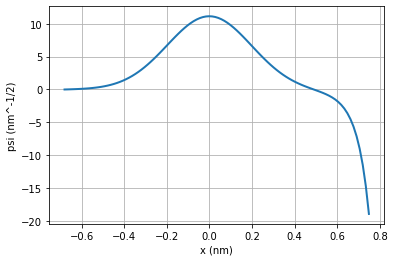

$\psi$ is heading down toward $-\infty$, so we know we have the wrong eigenenergy.

Now here's the result of the Shooting Method for hte same potential energy with an eigenenergy ugess of 0.95:
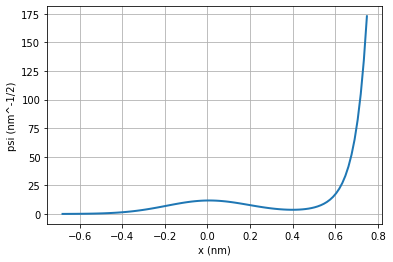

$\psi$ is now heading up toward $+\infty$. Although both 1.00 and 0.95 are not the correct eigenenergy, because their tails flip in different directions, **we do know that the correct eigenenergy has to be between 0.95 and 1.00!** When using the Shooting Method, you keep adjusting your guess for the eigenenergy until the tail of $\psi$ approaches the value that you want. For example, we would next try 0.975, and then keep splitting the difference.

Notice that we would need infinite accuracy to reach a $\psi$ that stayed nailed down at 0 perfectly. But we don't need that much accuracy. In this Assignment, you'll only need to determine eigenenergies out to 4 significant digits.

The only thing to be careful about is to look at energies that are above the minimum of the well (energies less than that will alway run away to infinity).

## Units
Much research in quantum mechanics uses units of electron-volts (eV) for energy and nanometers (nm) for length, since these units produce reasonable numbers at an electron-sized scale. We'll also record $\hbar$ in units of eV$\cdot$nm by using the value of $\hbar c$ and record the mass of the electron in eV by using the value of $m_e c^2$. These adjustments seem strange at first, but they help us use reasonable numerical values and allow us to easily compare wtih standard results.

## Step 1: Infinite Square Well

We'll start with the infinite square well, which has $V=0$ inside the well and $V=\infty$ outside the well. An electron cannot exist at infinite potential energy, so we know $\psi=0$ outside the well. Inside the well, the time-independent Scroedinger equation is given by:

$$-\frac{\hbar^2}{2m}\psi''=E\psi$$

with the boundary conditions:
$$\psi(x=\text{left boundary})=\psi(x=\text{right boundary})=0$$

For the shooting method, we start with knowing the left-most portion of the wavefunction ($\psi(x_\text{min})$) and integrate the Schroedinger equation all the way to the right edge. Therefore we've automatically satisfied the left boundary condition and we only need to look to see if the right boundary condition is met. If it's not, then it's time to adjust the energy parameter, $E$, and start over. By systematically exploring the energy parameter space, you can find the energies that satisfy both boundary conditions and hence must be an eigenenergy.

The two code cells below carry out the Shooting Method for an infinite square well with a left boundary of $x = 0$ and a right boundary of $x = 4$. Read through this code and desscribe what each line does.

[Add your answers here.]

In [1]:
from pylab import *

#UNITS: All lengths are in nm, all energies/masses are in eV.
hbar = 197 # hbar*c = 197 eV*nm
me = 511000 # me*c^2 = 511000 eV

def V(x):
    return 0

def psiDoublePrime(x,psi):
    return 2*me/hbar**2*(V(x)-E)*psi

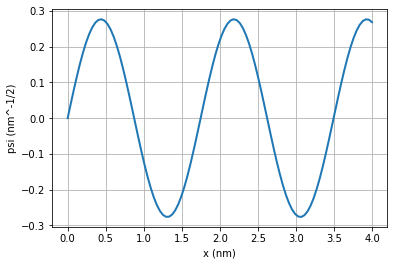

In [2]:
# Enter your guess for the energy here. Units are eV.
E = 0.5

# Enter minimum and maximum x and initial values for psi and psiPrime.
xmin = 0
xmax = 4
psi = 0
psiPrime = 1
nPoints = 100

dx = (xmax-xmin)/nPoints

xArray = linspace(xmin,xmax,nPoints)
psiArray = zeros(nPoints)

for i in range(len(xArray)):
    psiArray[i] = psi # Record previous value of psi.
    psiPrime += psiDoublePrime(xArray[i],psi)*dx # Step forward with psiPrime.
    psi += psiPrime*dx # Step forward with psi.

# Create plot
figure(1)
plot(xArray, psiArray, linewidth=2)
xlabel('x (nm)')
ylabel('psi (nm^-1/2)')
grid(True)
show()

## Step 2: $\psi$ and $E$ for the Infinite Square Well
Now run the two code cells above. Adjust the energy guess until you find a $\psi$ that satsifies the boundary conditions $\psi(0)=\psi(4)=0$. 

What value of $E$ produces a successful $\psi$? How many maxima does your $\psi$ have? Calculate the energy level using the [standard equation](https://en.wikipedia.org/wiki/Particle_in_a_box#Energy_levels). How well does your value for $E$ match the energy level from the standard equation?

[Add your answers here.]

Now adjust $E$ until you create a wave function that satsfies the boundary conditions with 1 maximum, 2 maxima, 3 maxima... up to 8 maxima. What pattern do you notice in $E$ as the number of maxima increases? How well does this pattern match the standard equation?

[Add your answers here:

$n = 1, E = $

$n = 2, E = $

$n = 3, E = $

$n = 4, E = $

$n = 5, E = $

$n = 6, E = $

$n = 7, E = $

$n = 8, E = $

Be sure to reference the energy level $n$ in your description.]

We saw earlier that wherever $\psi = 0$, the electron cannot be. Where do you see $\psi = 0$ in your graphs? How is the principle that the electron cannot exist at those locations weird compared with our experience in classical mechanics?

[Add your answer here.]


## Step 3: The Finite Square Well

A finite well of width $a$ and depth $V_{0}$ is set up using a piecewise function for $V(x)$:

$$ V(x) = \left\{ \begin{array}{cc} 0, & 0<x<a \\ V_{0} & \text{elsewhere} \end{array} \right. $$

We'll see that this potential energy makes it most likely for the electron to be located inside the well ($0<x<a$), but the wave function can leak out going toward $-\infty$ or $+\infty$. This leaking is what leads to [quantum tunneling](https://en.wikipedia.org/wiki/Quantum_tunnelling), one of the most important applications of quantum mechanics. The leaking wave function still has to approach 0 as $x \rightarrow \pm \infty$.

For the finite square well, a few of the procedural steps above need to be adjusted. Now we don't know a guaranteed point on the wavefunction because it's only truly zero at $x=-\infty$, and we don't have time to start the code there. So you have to guess a location and adjust the initial conditions to look for acceptable solutions. Typically it's easiest to pick a spot off to the left and set $\psi$ there to be small. (Again, the actual value doesn't matter nearly as much as the general shape.) Even zero will work if you're far enough into the wall. 

For the initial $\psi'$ value, you have to pick a non-zero value if you chose $\psi=0$. Since this value just changes the overall size of $\psi$ and not its shape, almost any combination of initial values for $\psi$ and $\psi'$ will work (other than zero and zero). You just want to watch that the initial point looks smooth in the full plot. You also want to be careful that the exponential growth of the function from the initial point to the inside of the well doesn't cause an overflow problem with your calculation.

![finite well](images/finiteflat.gif)

Describe how the piecewise function is set up in the code cells below. What are the values of $a$ and $V_0$?

[Add your answers here.]

In [3]:
from pylab import *

#UNITS: All lengths are in nm, all energies/masses are in eV.
hbar = 197 # hbar*c = 197 eV*nm
me = 511000 # me*c^2 = 511000 eV

def V(x):
    if (0<x<2):
        return 0
    else:
        return 5

def psiDoublePrime(x,psi):
    return 2*me/hbar**2*(V(x)-E)*psi

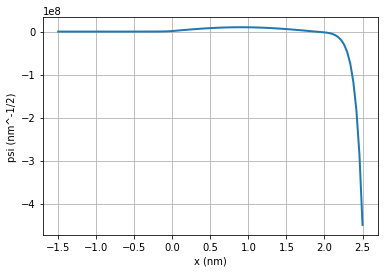

In [7]:
# Enter your guess for the energy here. Units are eV.
E = 0.1

# Enter minimum and maximum x and initial values for psi and psiPrime.
xmin = -1.5
xmax = 2.5
psi = 0.1
psiPrime = 0.1
nPoints = 100

dx = (xmax-xmin)/nPoints

xArray = linspace(xmin,xmax,nPoints)
psiArray = zeros(nPoints)

for i in range(len(xArray)):
    psiArray[i] = psi # Record previous value of psi.
    psiPrime += psiDoublePrime(xArray[i],psi)*dx # Step forward with psiPrime.
    psi += psiPrime*dx # Step forward with psi.

# Create plot
figure(1)
plot(xArray, psiArray, linewidth=2)
xlabel('x (nm)')
ylabel('psi (nm^-1/2)')
grid(True)
show()

## Step 4: $\psi$ and $E$ for the Finite Square Well
Now run the two code cells above. Adjust the energy guess until you find a $\psi$ that keeps $\psi$ going to zero within the range of the plot.

What value of $E$ produces a successful $\psi$? How many maxima does your $\psi$ have? 

[Add your answers here.]

Now adjust $E$ until you create a wave function that satsfies the boundary conditions with 1 maximum, 2 maxima, 3 maxima... up to however many maxima you can find **while keeping** $E<V_0$. What pattern do you notice in $E$ as the number of maxima increases?

[Add your answers here:

$n = 1, E = $

$n = 2, E = $

...]

Notice that $\psi$ decays into the wall of the poential ($x>1$ and $x<-1$), where the total energy is less than the potential energy. How is this behavior weird compared with our experience in classical mechanics?

[Add your answer here.]

Now, what happens to the wave function if you set $E>V_0$? Can you explain this difference in behavior from the $E<V_0$ cases?

[Add your answers here.]


The differences you've observed in the different **regimes** of $E<V_0$ and $E>V_0$ are due to the qualitative change from **bound states** to **scattering states**, or states that are bound to well versus states that are allowed to move in and out of the well freely. In contrast, the infinite square well has **no scattering states**, as there's no escaping an infinitely deep well.

Our last potential energy function, the harmonic oscillator, has only bound states, as well.

## Step 5: The Harmonic Oscillator

The harmonic oscillator is our favorite problem in physics. It can be solved exactly in classical mechanics, quantum mechanics, and special relativity. The potential energy is given by

$$ V(x) = \frac{1}{2} m \omega^2 x^2,$$

where $\omega$ is the oscillator's **angular frequency**. (We'll enter $\omega$ as $\omega c$, measured in units of nm$^{-1}$... Yes, units get weird in quantum mechanics. Think of this as the electron's wave number - remember those?)

At first glance, it isn't really clear what values of ``xmin`` and ``xmax`` we should use. There isn't an edge to this well; it just keeps climbing. One good place to start is the **classical turning points**, the two values of $x$ at which there is no kinetic energy and so $E = \frac{1}{2}m \omega^2 x^2$.

Solve this equation for $x$ based on the energy $E$; the square means you'll get two values. Add this expression for ``xmin`` and ``xmax`` below, using your energy guess, and multiply it by 2 (so that the Shooting Method has a broad enough range).

[Document your math work here using $\LaTeX$.]

In [72]:
from pylab import *

#UNITS: All lengths are in nm, all energies/masses are in eV.
hbar = 197 # hbar*c = 197 eV*nm
me = 511000 # me*c^2 = 511000 eV
omega = 1e-2 # angular frequency / c, in nm^-1

def V(x):
#     return 0
    return 0.5*me*(omega**2)*(x**2)

def psiDoublePrime(x,psi):
    return 2*me/hbar**2*(V(x)-E)*psi

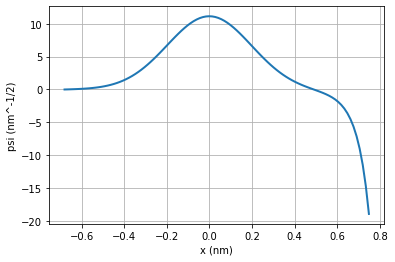

In [73]:
# Enter your guess for the energy here. Units are eV.
E = 1.00
# Enter minimum and maximum x and initial values for psi and psiPrime.
xmin = ??
xmax = ??
psi = 0
psiPrime = 1
nPoints = 100

dx = (xmax-xmin)/nPoints

xArray = linspace(xmin,xmax,nPoints)
psiArray = zeros(nPoints)

for i in range(len(xArray)):
    psiArray[i] = psi # Record previous value of psi.
    psiPrime += psiDoublePrime(xArray[i],psi)*dx # Step forward with psiPrime.
    psi += psiPrime*dx # Step forward with psi.

# Create plot
figure(1)
plot(xArray, psiArray, linewidth=2)
xlabel('x (nm)')
ylabel('psi (nm^-1/2)')
grid(True)
show()

## Step 6: $\psi$ and $E$ for the Harmonic Oscillator
You know the drill by now. Run the two code cells below and adjust the energy guess until the code produces a $\psi$ that doesn't go off to $\pm \infty$ in the range of the graph. A good place to start is $\hbar \omega$, which gives a fundamental energy scale for the problem.

What value of $E$ produces a successful $\psi$? How many maxima does your $\psi$ have? 

[Add your answers here.]

Now adjust $E$ until you create a wave function that satsfies the boundary conditions with 1 maximum, 2 maxima, 3 maxima... up to however many maxima it takes until you find a pattern in the eigenenergies. What pattern do you notice in $E$ as the number of maxima increases? How well does this pattern match [the standard equation](https://en.wikipedia.org/wiki/Quantum_harmonic_oscillator#Hamiltonian_and_energy_eigenstates)?

[Add your answers here:

$n = 1, E = $

$n = 2, E = $

...]

Again, notice that $\psi$ decays into the potential energy past the classical turning points, where the total energy is less than the potential energy. How is this behavior weird compared with our experience in classical mechanics?

[Add your answer here.]



## Step 7: Comparison
You've now solved three quantum mechanics problems. What do the results have in common? What makes them different?

[Add your answers here.]

# Extra Credit

## Step 8

We left out one step in our calculations of $\psi$, which is that $\psi$ must be **normalized**: 

$$
\begin{eqnarray}
\int_{-\infty}^{+\infty} \psi^2 dx = 1
\end{eqnarray}
$$
This doesn't change the shape of $\psi$ but ensures that it gives us correct numbers we can compare with experiment. We can make $\psi$ normalized by converting this integral into a sum for our array:

``
sum = 0
for p in psiArray:
    sum += p**2*dx
``

and then dividing each element of ``\psiArray`` by the square root of ``sum``. Add these steps to the code cells above and normalize all the $\psi$s you determined in this Assignment.

## Step 9

Select one of the potential energies above and store its eigenfunctions in separate arrays. (You'll have to give them different names, like ``psi1Array``, ``psi2Array``, etc.) Plot them all in the same graph.

## Step 10

Select one of the potential energies above and find the eigenenergies for several different values of $m$. How do the energy levels change? What pattern do you observe?